In [3]:
%matplotlib notebook
import numpy as np
from scipy import ndimage
from ripser import ripser
from persim import plot_diagrams as plot_dgms
import matplotlib.pyplot as plt
from scipy import sparse
import time

#esta libreria nos ayuda a importar imagenes
import PIL
from mpl_toolkits.mplot3d import Axes3D
import sys 

import ipywidgets as widgets
from IPython.display import display



"""Matrices that mostly contain zeroes are said to be sparse.
Storing such data in a two-dimensional matrix data structure is a waste of space. Also, it is 
computationally expensive to represent and work with sparse matrices as though they are dense.
ex.
Dense matrix representation: 
 [[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
Sparse matrix: 
  (0, 0)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2"""




'Matrices that mostly contain zeroes are said to be sparse.\nStoring such data in a two-dimensional matrix data structure is a waste of space. Also, it is \ncomputationally expensive to represent and work with sparse matrices as though they are dense.\nex.\nDense matrix representation: \n [[1 0 0 0 0 0]\n [0 0 2 0 0 1]\n [0 0 0 2 0 0]]\nSparse matrix: \n  (0, 0)\t1\n  (1, 2)\t2\n  (1, 5)\t1\n  (2, 3)\t2'

FloatSlider(value=1.0, continuous_update=False, description='\\(\\tau :\\)', max=31.40027243025217)

<IPython.core.display.Javascript object>


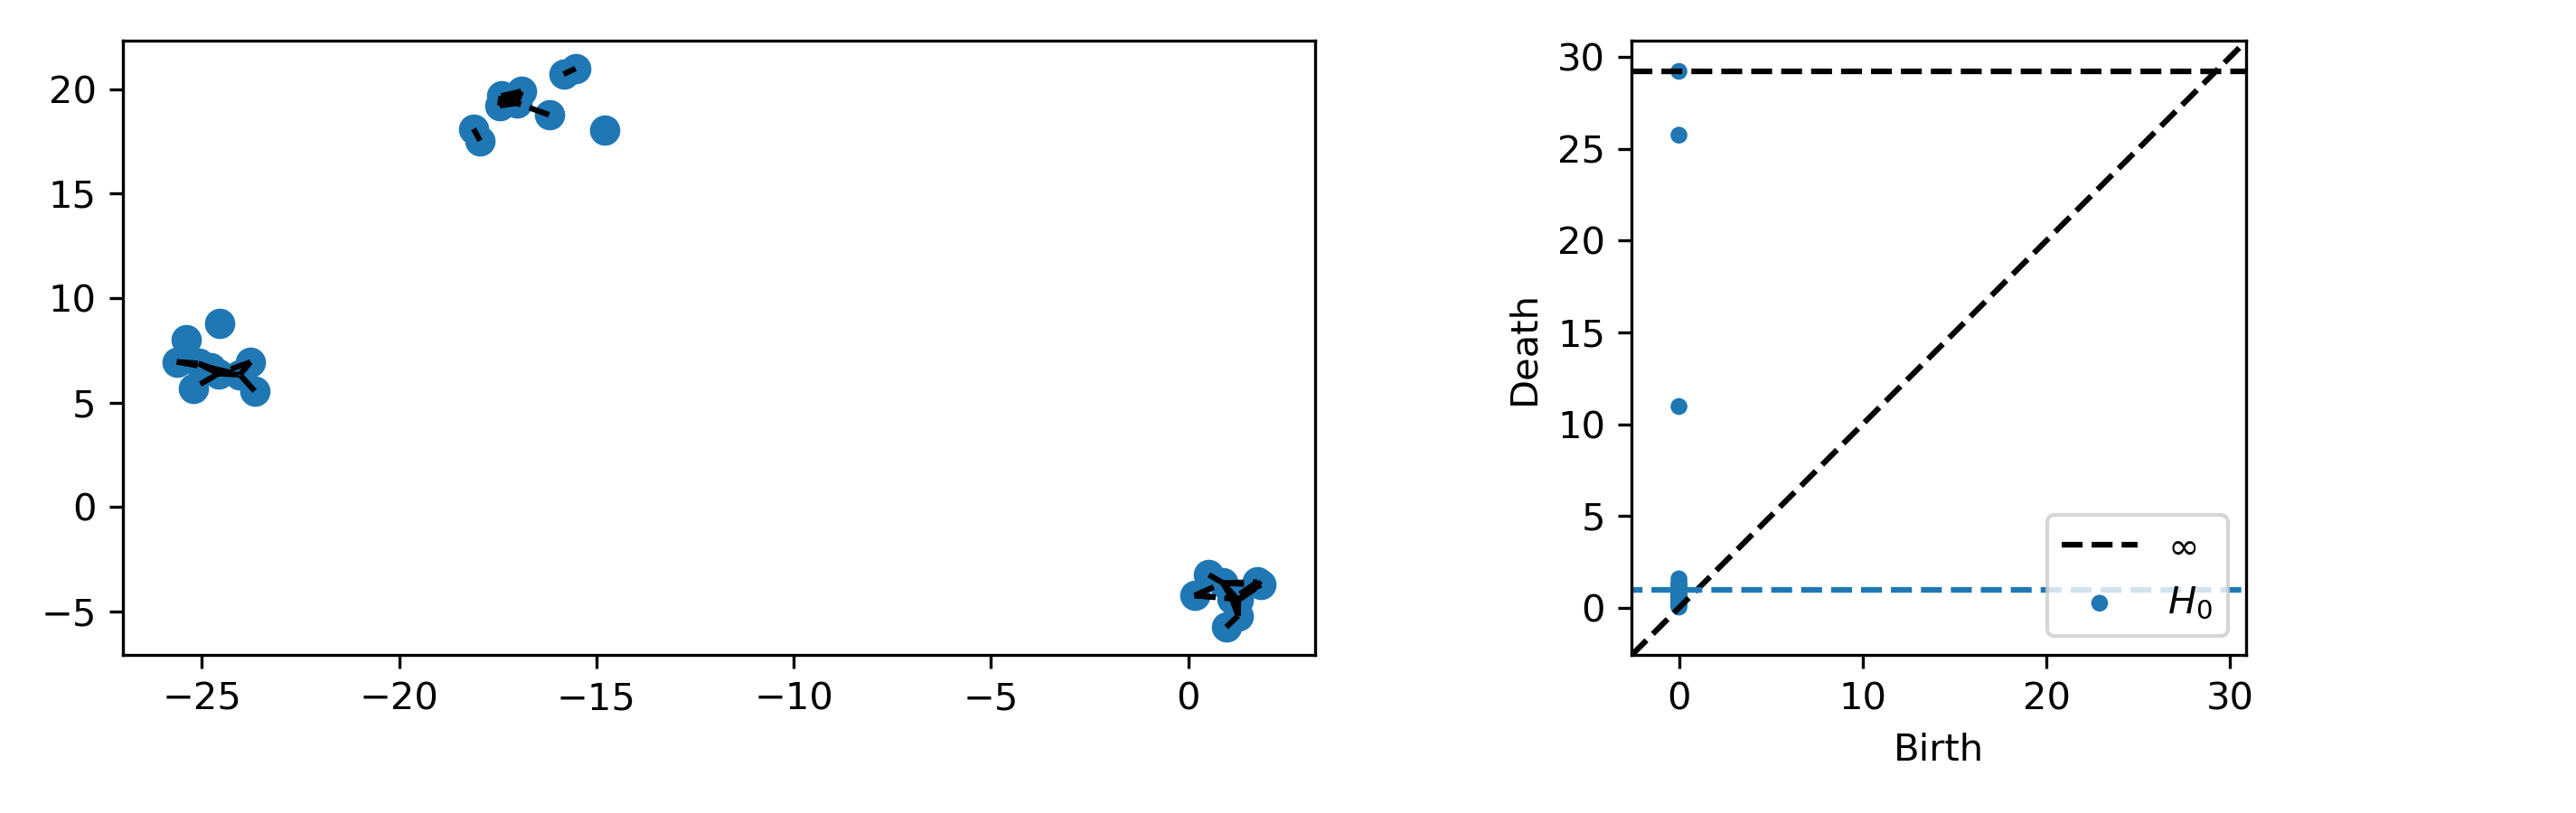

In [4]:
# First setup point cloud
np.random.seed(0)
NClusters = 3
PPC = 10 #Points per cluster
N = NClusters*PPC
X = np.zeros((N, 2))
for c in range(NClusters):
    X[c*PPC:(c+1)*PPC, :] = np.random.randn(PPC, 2) + 10*np.random.randn(2)[None, :]

# Compute persistence diagram
res = ripser(X, maxdim=0)
H0 = res['dgms'][0]
D = res['dperm2all']
    
def on_value_change(change):
    execute_computation1()
Tauslider = widgets.FloatSlider(min=0.0, max = np.max(D), x=5,step=0.1,value=1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')
display(Tauslider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    cutoff = Tauslider.value
    
    ax1.scatter(X[:, 0], X[:, 1], 50)
    for i in range(N):
        for j in range(i+1, N):
            if D[i, j] < cutoff:
                ax1.plot(X[[i, j], 0], X[[i, j], 1], 'k', linestyle='--')
    plt.sca(ax2)
    plot_dgms(H0)
    ax2.plot([-0.1*np.max(D), np.max(D)], [cutoff, cutoff], linestyle='--')
    plt.tight_layout()

    
execute_computation1()


In [5]:
def lower_star_filtration(x):
    N = len(x)
    # Add edges between adjacent points in the time series, with the "distance" 
    # along the edge equal to the max value of the points it connects
    I = np.arange(N-1)
    J = np.arange(1, N)
    V = np.maximum(x[0:-1], x[1::])
    # Add vertex birth times along the diagonal of the distance matrix
    I = np.concatenate((I, np.arange(N)))
    J = np.concatenate((J, np.arange(N)))
    V = np.concatenate((V, x))
    #Create the sparse distance matrix
    D = sparse.coo_matrix((V, (I, J)), shape=(N, N)).tocsr()
    return ripser(D, maxdim=0, distance_matrix=True)['dgms'][0]

FloatSlider(value=-1.362585530789986, continuous_update=False, description='\\(\\tau :\\)', max=5.362585530789…

<IPython.core.display.Javascript object>


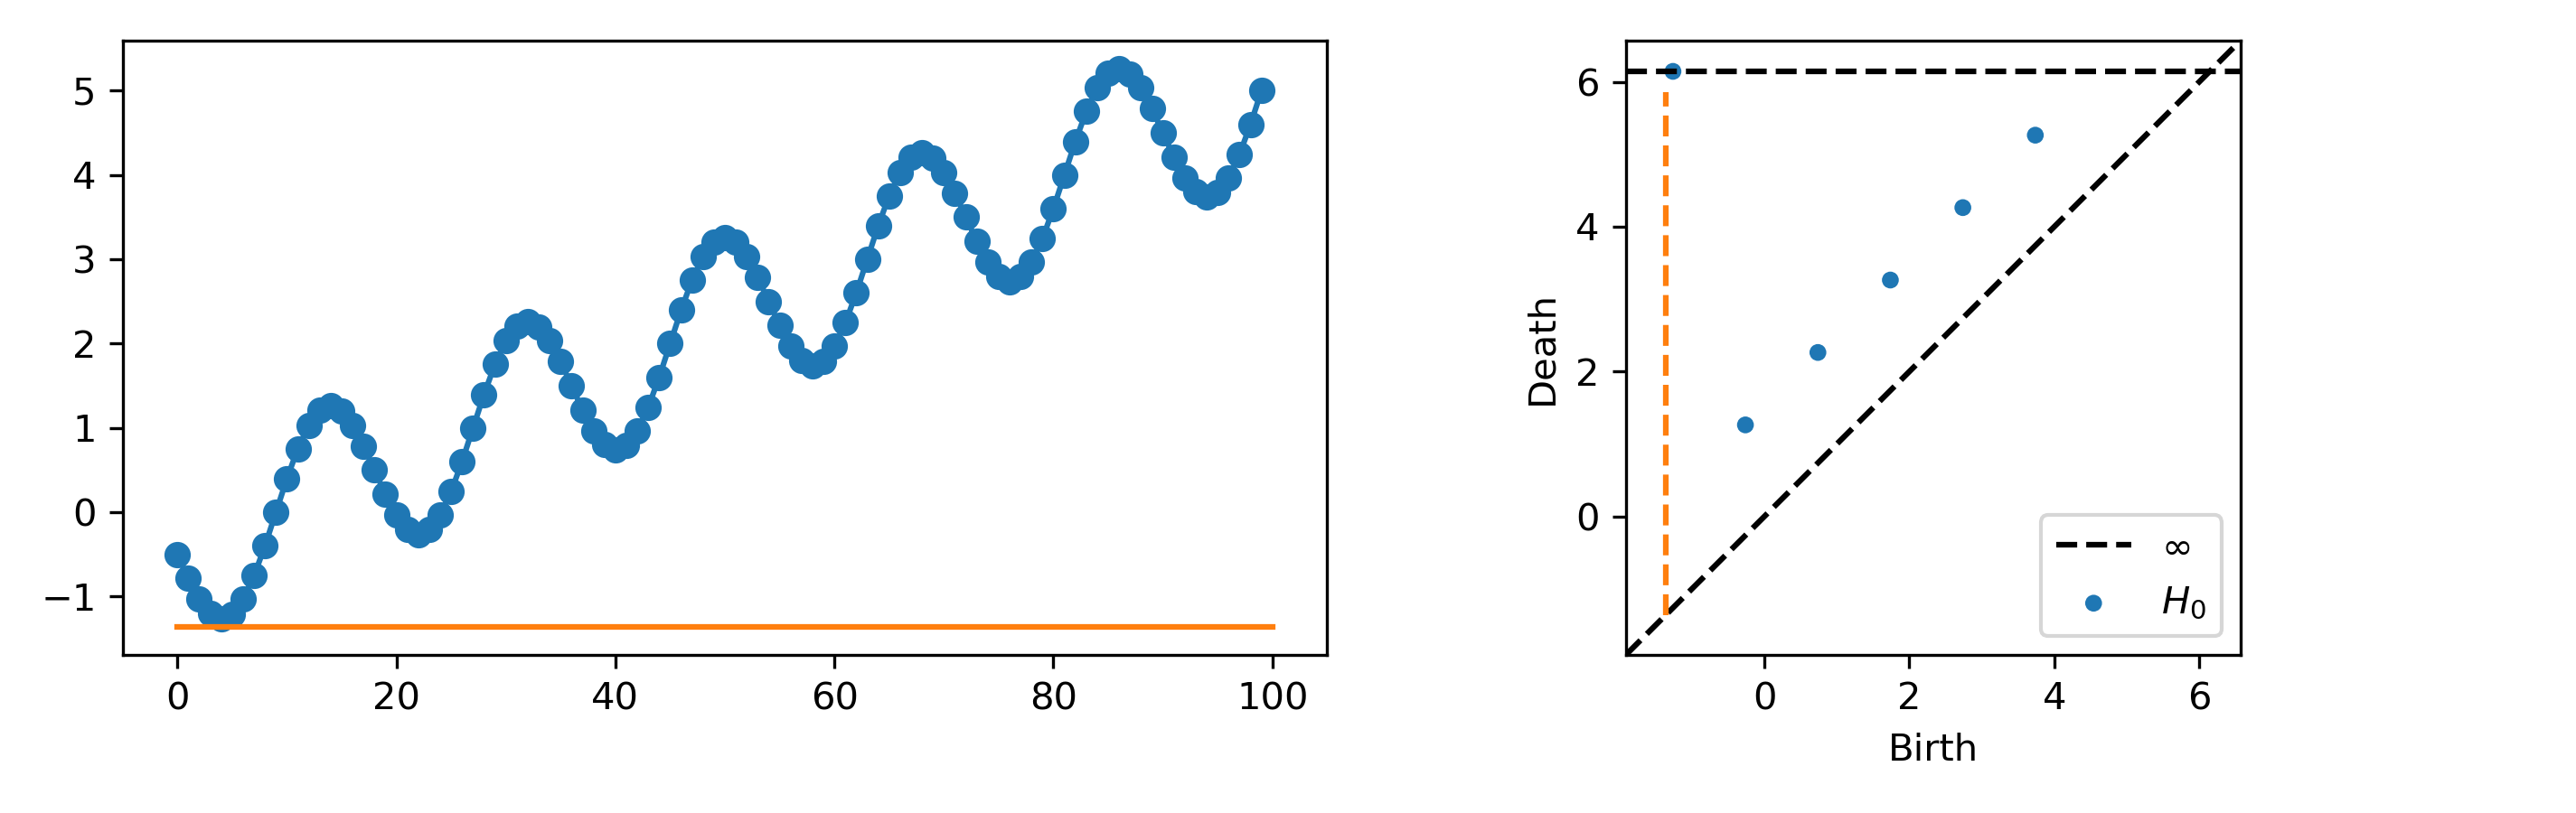

In [25]:
np.random.seed(1)
NPeriods = 5
NSamples = 100
t = np.linspace(-0.5, NPeriods, NSamples)
x = np.sin(2*np.pi*t) + t

H0 = lower_star_filtration(x)
    
def on_value_change(change):
    execute_computation1()
Tauslider = widgets.FloatSlider(min=np.min(x)-0.1, max = np.max(x)+0.1, x=5,step=0.05,value=np.min(x)-0.1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')
display(Tauslider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    cutoff = Tauslider.value
    
    ax1.plot(x)
    ax1.plot([0, len(x)], [cutoff, cutoff])
    ax1.scatter(np.arange(len(x)), x)
    for i in range(len(x)):
        if x[i] <= cutoff:
            ax1.scatter([i]*2, [x[i]]*2, c='C1')
        if i < len(x)-1:
            if x[i] <= cutoff and x[i+1] <= cutoff:
                ax1.plot([i, i+1], x[i:i+2], c='C1')
    plt.sca(ax2)
    plot_dgms(H0)
    ax2.plot([np.min(x)-0.1, cutoff], [cutoff, cutoff], linestyle='--', c='C1')
    ax2.plot([cutoff, cutoff], [cutoff, np.max(x)+0.6], linestyle='--', c='C1')
    plt.tight_layout()

    
execute_computation1()

FloatSlider(value=-4.3, continuous_update=False, description='\\(\\tau :\\)', max=3.3000000000000003, min=-4.3…

<IPython.core.display.Javascript object>


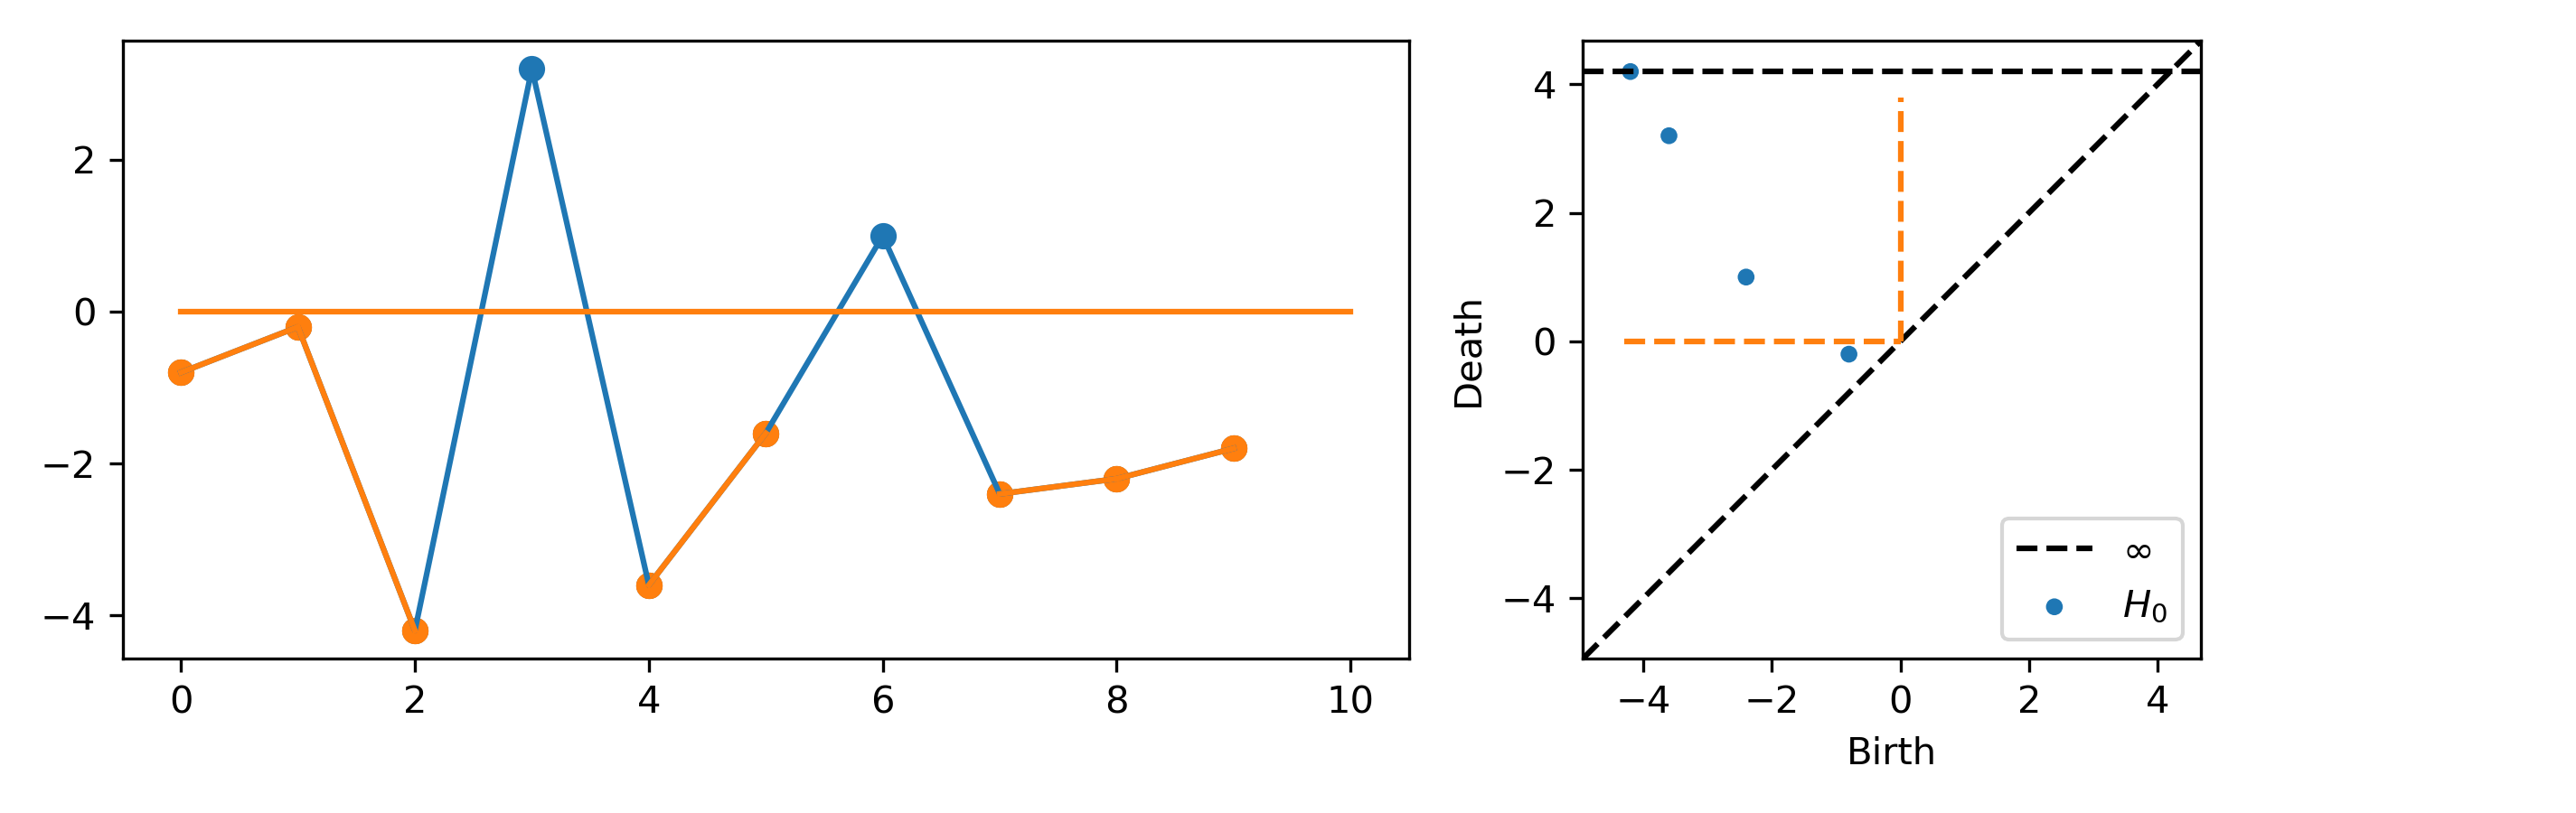

In [29]:
np.random.seed(2)
x = np.random.randn(10)*2
x = np.round(x*5)/5.0

H0 = lower_star_filtration(x)
    
def on_value_change(change):
    execute_computation1()
Tauslider = widgets.FloatSlider(min=np.min(x)-0.1, max = np.max(x)+0.1, x=5,step=0.05,value=np.min(x)-0.1,description=r'\(\tau :\)' ,continuous_update=False)
Tauslider.observe(on_value_change, names='value')
display(Tauslider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    cutoff = Tauslider.value
    
    ax1.plot(x)
    ax1.plot([0, len(x)], [cutoff, cutoff])
    ax1.scatter(np.arange(len(x)), x)
    for i in range(len(x)):
        if x[i] <= cutoff:
            ax1.scatter([i]*2, [x[i]]*2, c='C1')
        if i < len(x)-1:
            if x[i] <= cutoff and x[i+1] <= cutoff:
                ax1.plot([i, i+1], x[i:i+2], c='C1')
    plt.sca(ax2)
    plot_dgms(H0)
    ax2.plot([np.min(x)-0.1, cutoff], [cutoff, cutoff], linestyle='--', c='C1')
    ax2.plot([cutoff, cutoff], [cutoff, np.max(x)+0.6], linestyle='--', c='C1')
    
    plt.tight_layout()

    
execute_computation1()

FloatSlider(value=1.0, continuous_update=False, description='warp', max=5.0, min=0.1, step=0.05)

<IPython.core.display.Javascript object>


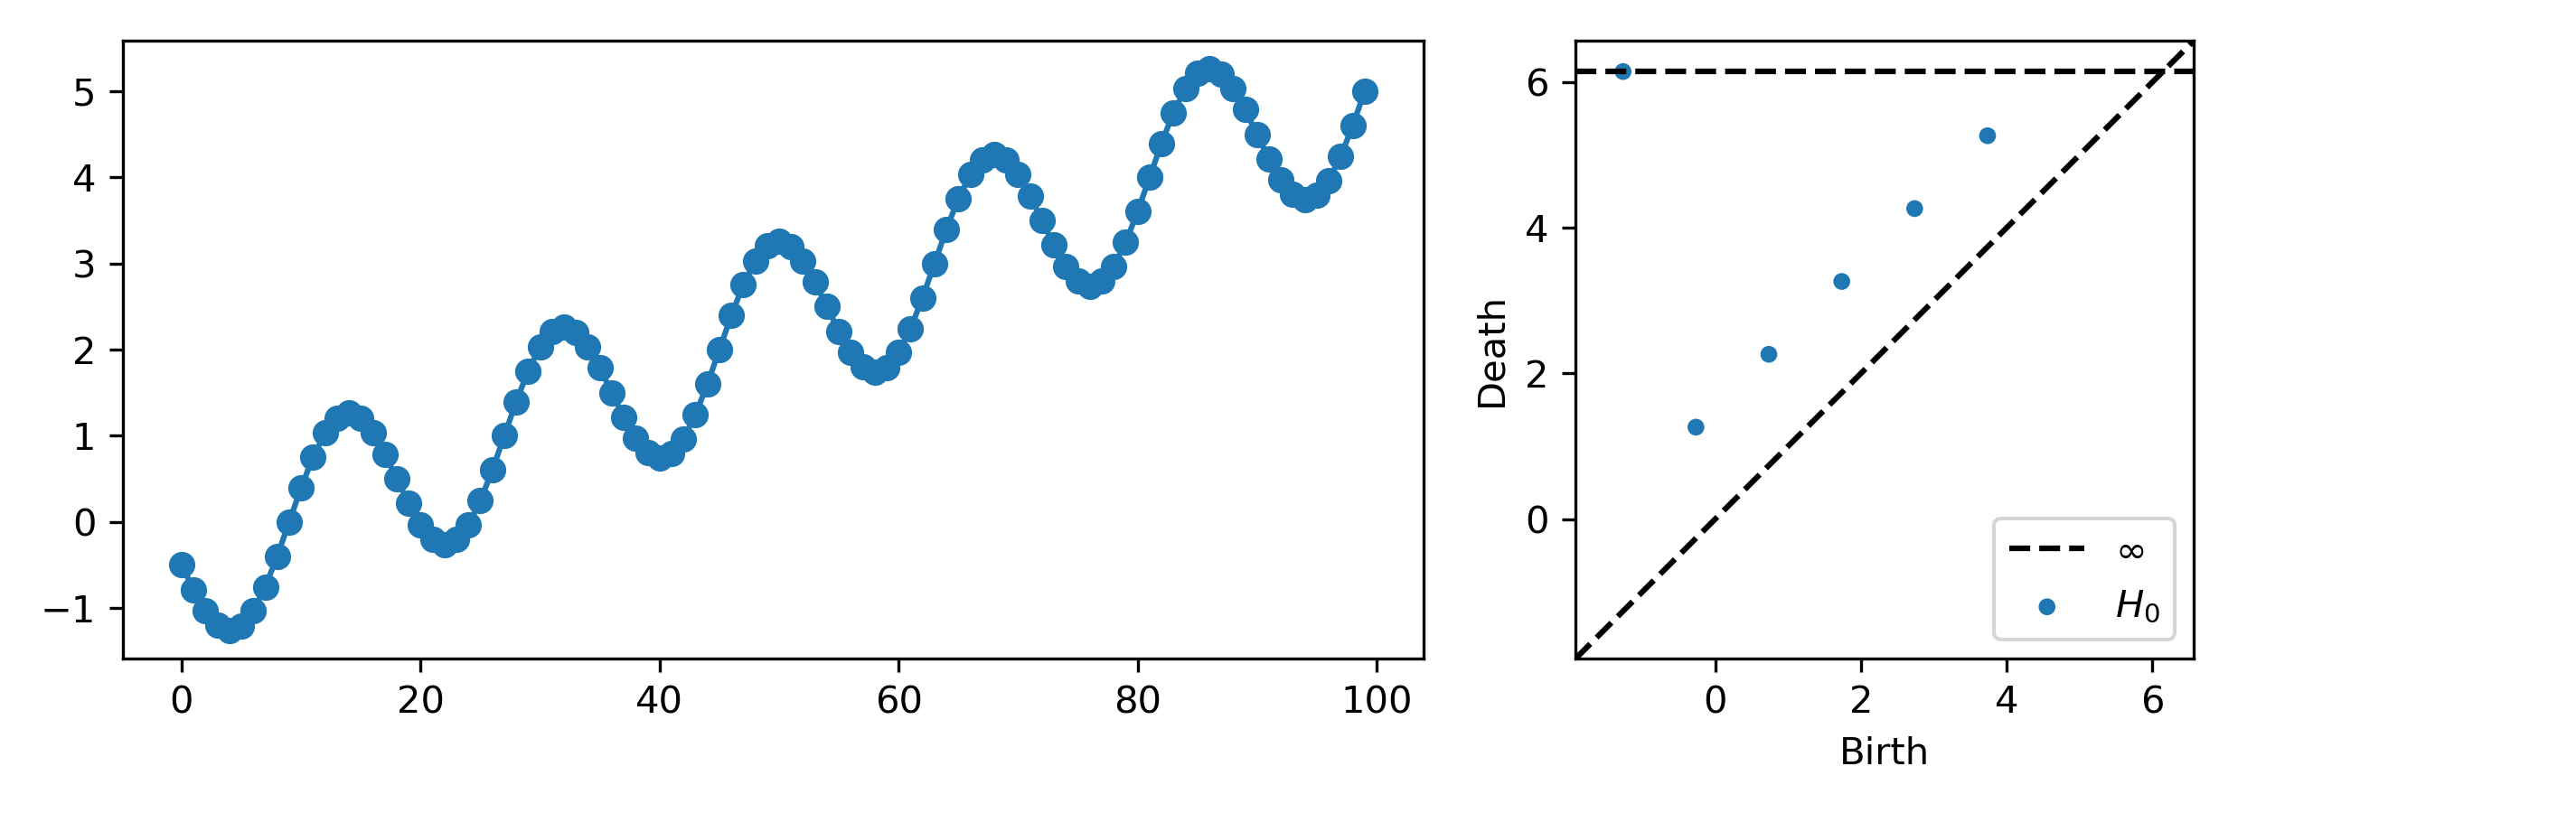

In [27]:
np.random.seed(1)
NPeriods = 5
NSamples = 100
t = np.linspace(-0.5, NPeriods, NSamples)
x = np.sin(2*np.pi*t) + t

    
def on_value_change(change):
    execute_computation1()
WarpSlider = widgets.FloatSlider(min=0.1, max = 5,step=0.05,value=1,description=r'warp' ,continuous_update=False)
WarpSlider.observe(on_value_change, names='value')
display(WarpSlider)

fig = plt.figure(figsize=(9.5, 3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


def execute_computation1():    
    ax1.clear()
    ax2.clear()
    
    # Get slider values
    p = WarpSlider.value
    t = np.linspace(0, 1, NSamples)**p
    t = (t*(NPeriods+0.5))-0.5
    x = np.sin(2*np.pi*t) + t
    
    ax1.plot(x)
    ax1.scatter(np.arange(len(x)), x)
    H0 = lower_star_filtration(x)
    plt.sca(ax2)
    plot_dgms(H0)
    plt.tight_layout()
    
    
execute_computation1()

In [11]:
def lower_star_image(D):
    """
    Construct a lower star filtration on an image
    Parameters
    ----------
    D: ndarray (M, N)
        An array of image data
    Returns
    -------
    I: ndarray (K, 2)
        A 0D persistence diagram corresponding to the sublevelset filtration
    """
    idxs = np.arange(D.shape[0]*D.shape[1])
    idxs = np.reshape(idxs, D.shape)
    I = idxs.flatten()
    J = idxs.flatten()
    V = D.flatten()
    # Do 8 spatial neighbors
    tidxs = np.nan*np.ones((D.shape[0]+2, D.shape[1]+2), dtype=np.int64)
    tidxs[1:-1, 1:-1] = idxs
    tD = np.nan*np.ones_like(tidxs)
    tD[1:-1, 1:-1] = D
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0:
                continue
            thisJ = np.roll(tidxs, di, axis=0)
            thisJ = np.roll(thisJ, dj, axis=1)
            thisD = np.roll(tD, di, axis=0)
            thisD = np.roll(thisD, dj, axis=1)
            thisD = np.maximum(thisD, tD)
            # Deal with boundaries
            thisI = tidxs[np.isnan(thisD)==0]
            thisJ = thisJ[np.isnan(thisD)==0]
            thisD = thisD[np.isnan(thisD)==0]
            I = np.concatenate((I, thisI.flatten()))
            J = np.concatenate((J, thisJ.flatten()))
            V = np.concatenate((V, thisD.flatten()))
    sparseDM = sparse.coo_matrix((V, (I, J)), shape=(idxs.size, idxs.size))
    return ripser(sparseDM, distance_matrix=True, maxdim=0)['dgms'][0]

<IPython.core.display.Javascript object>


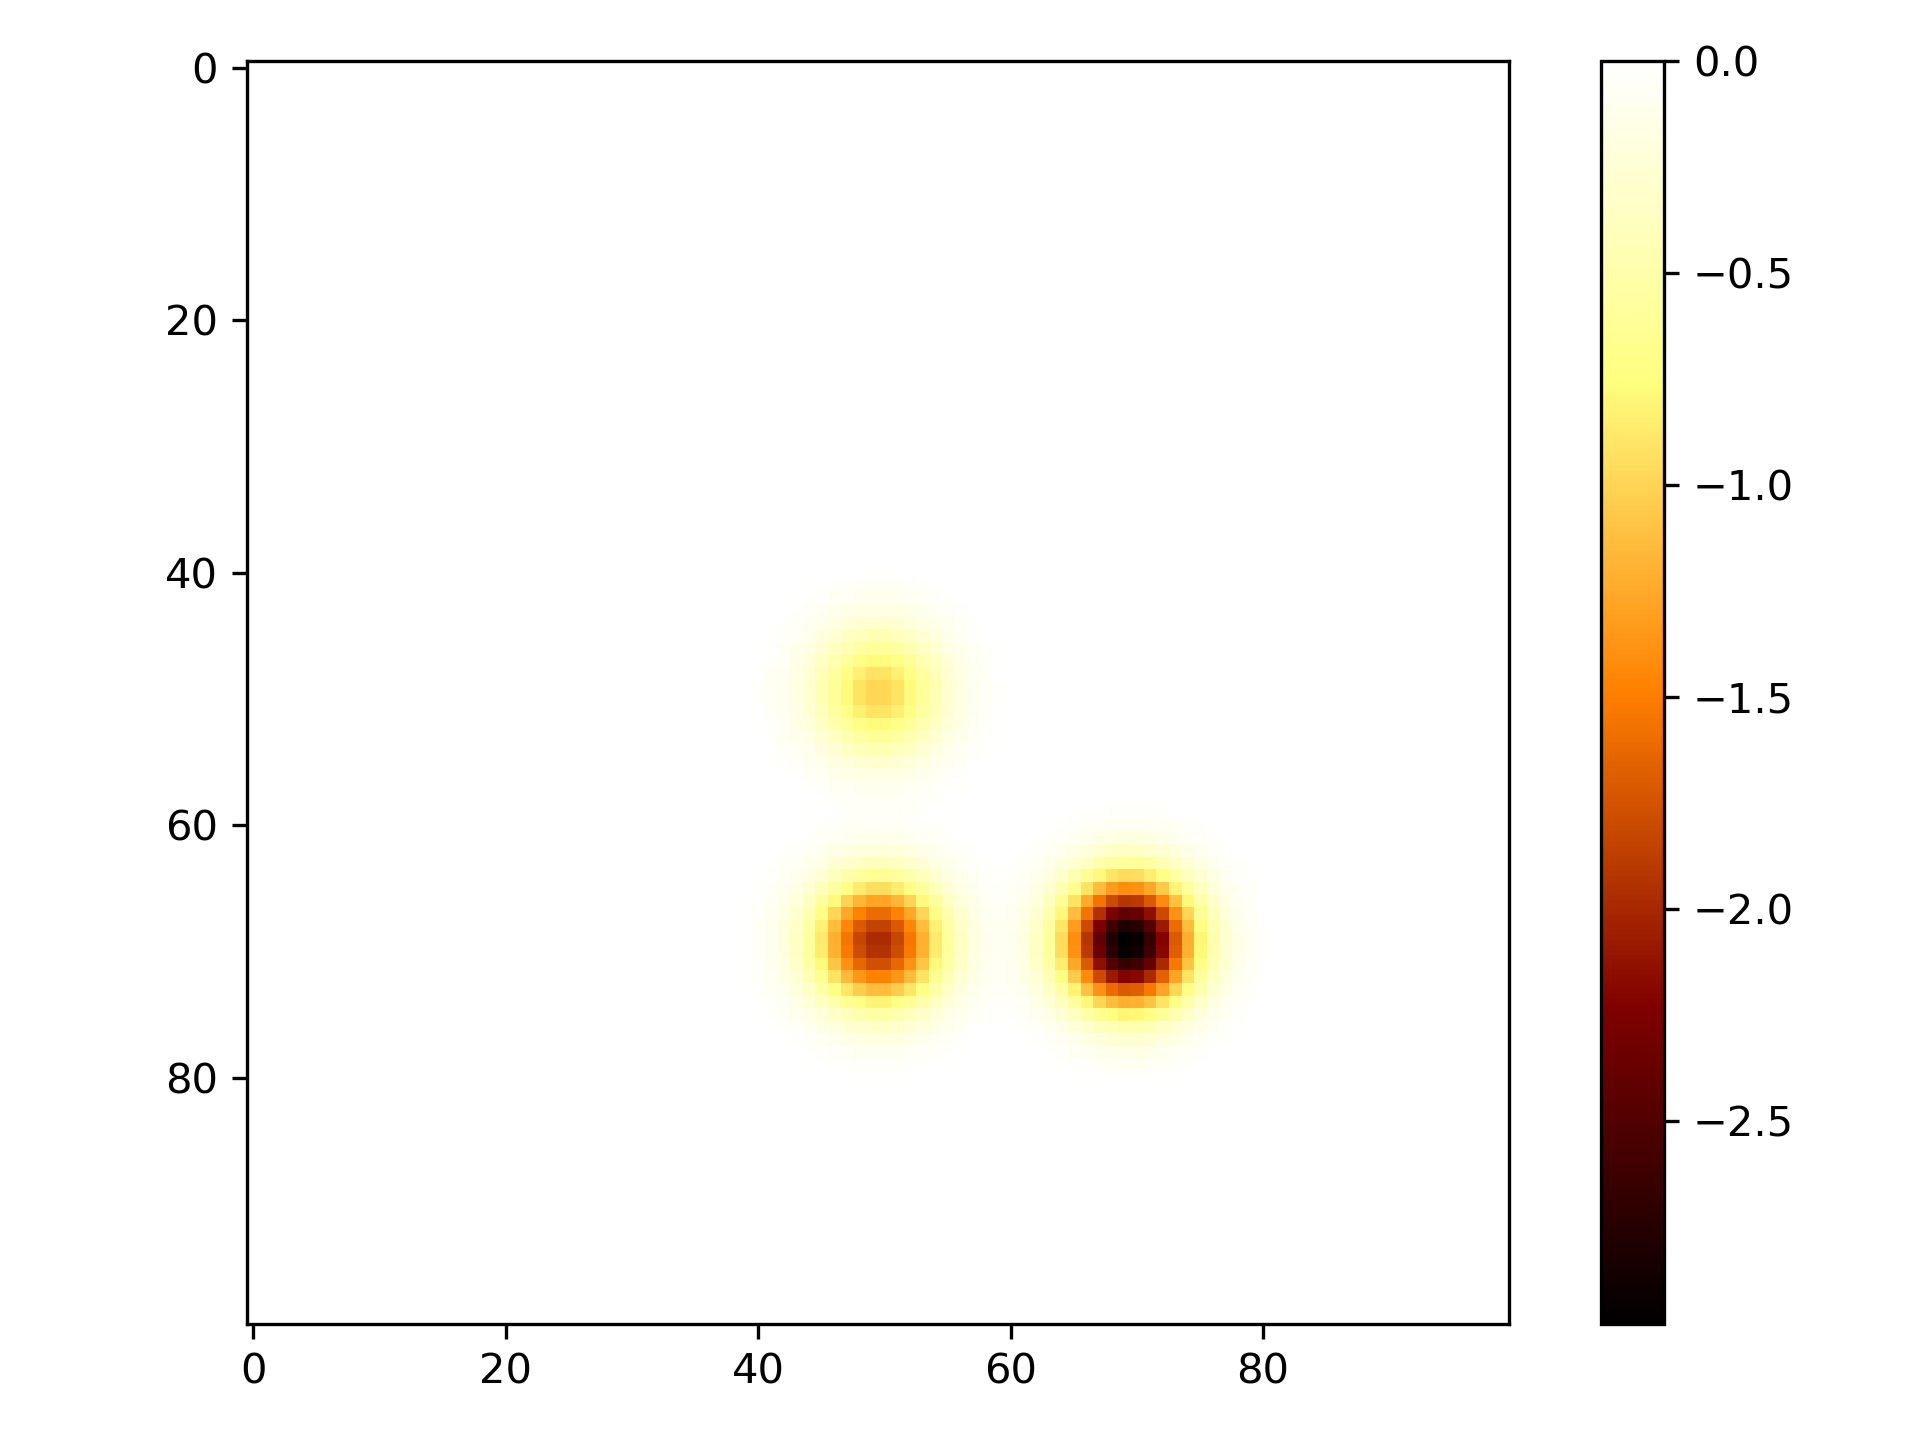

In [28]:
plt.figure()
ts = np.linspace(-1, 1, 100)
x1 = np.exp(-ts**2/(0.1**2))
ts -= 0.4
x2 = np.exp(-ts**2/(0.1**2))

# Define depths of Gaussian blobs
h1 = -1
h2 = -2
h3 = -3
img = h1*x1[None, :]*x1[:, None] + h2*x1[None, :]*x2[:, None] + h3*x2[None, :]*x2[:, None]
plt.imshow(img, cmap = 'afmhot')
plt.colorbar()

plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


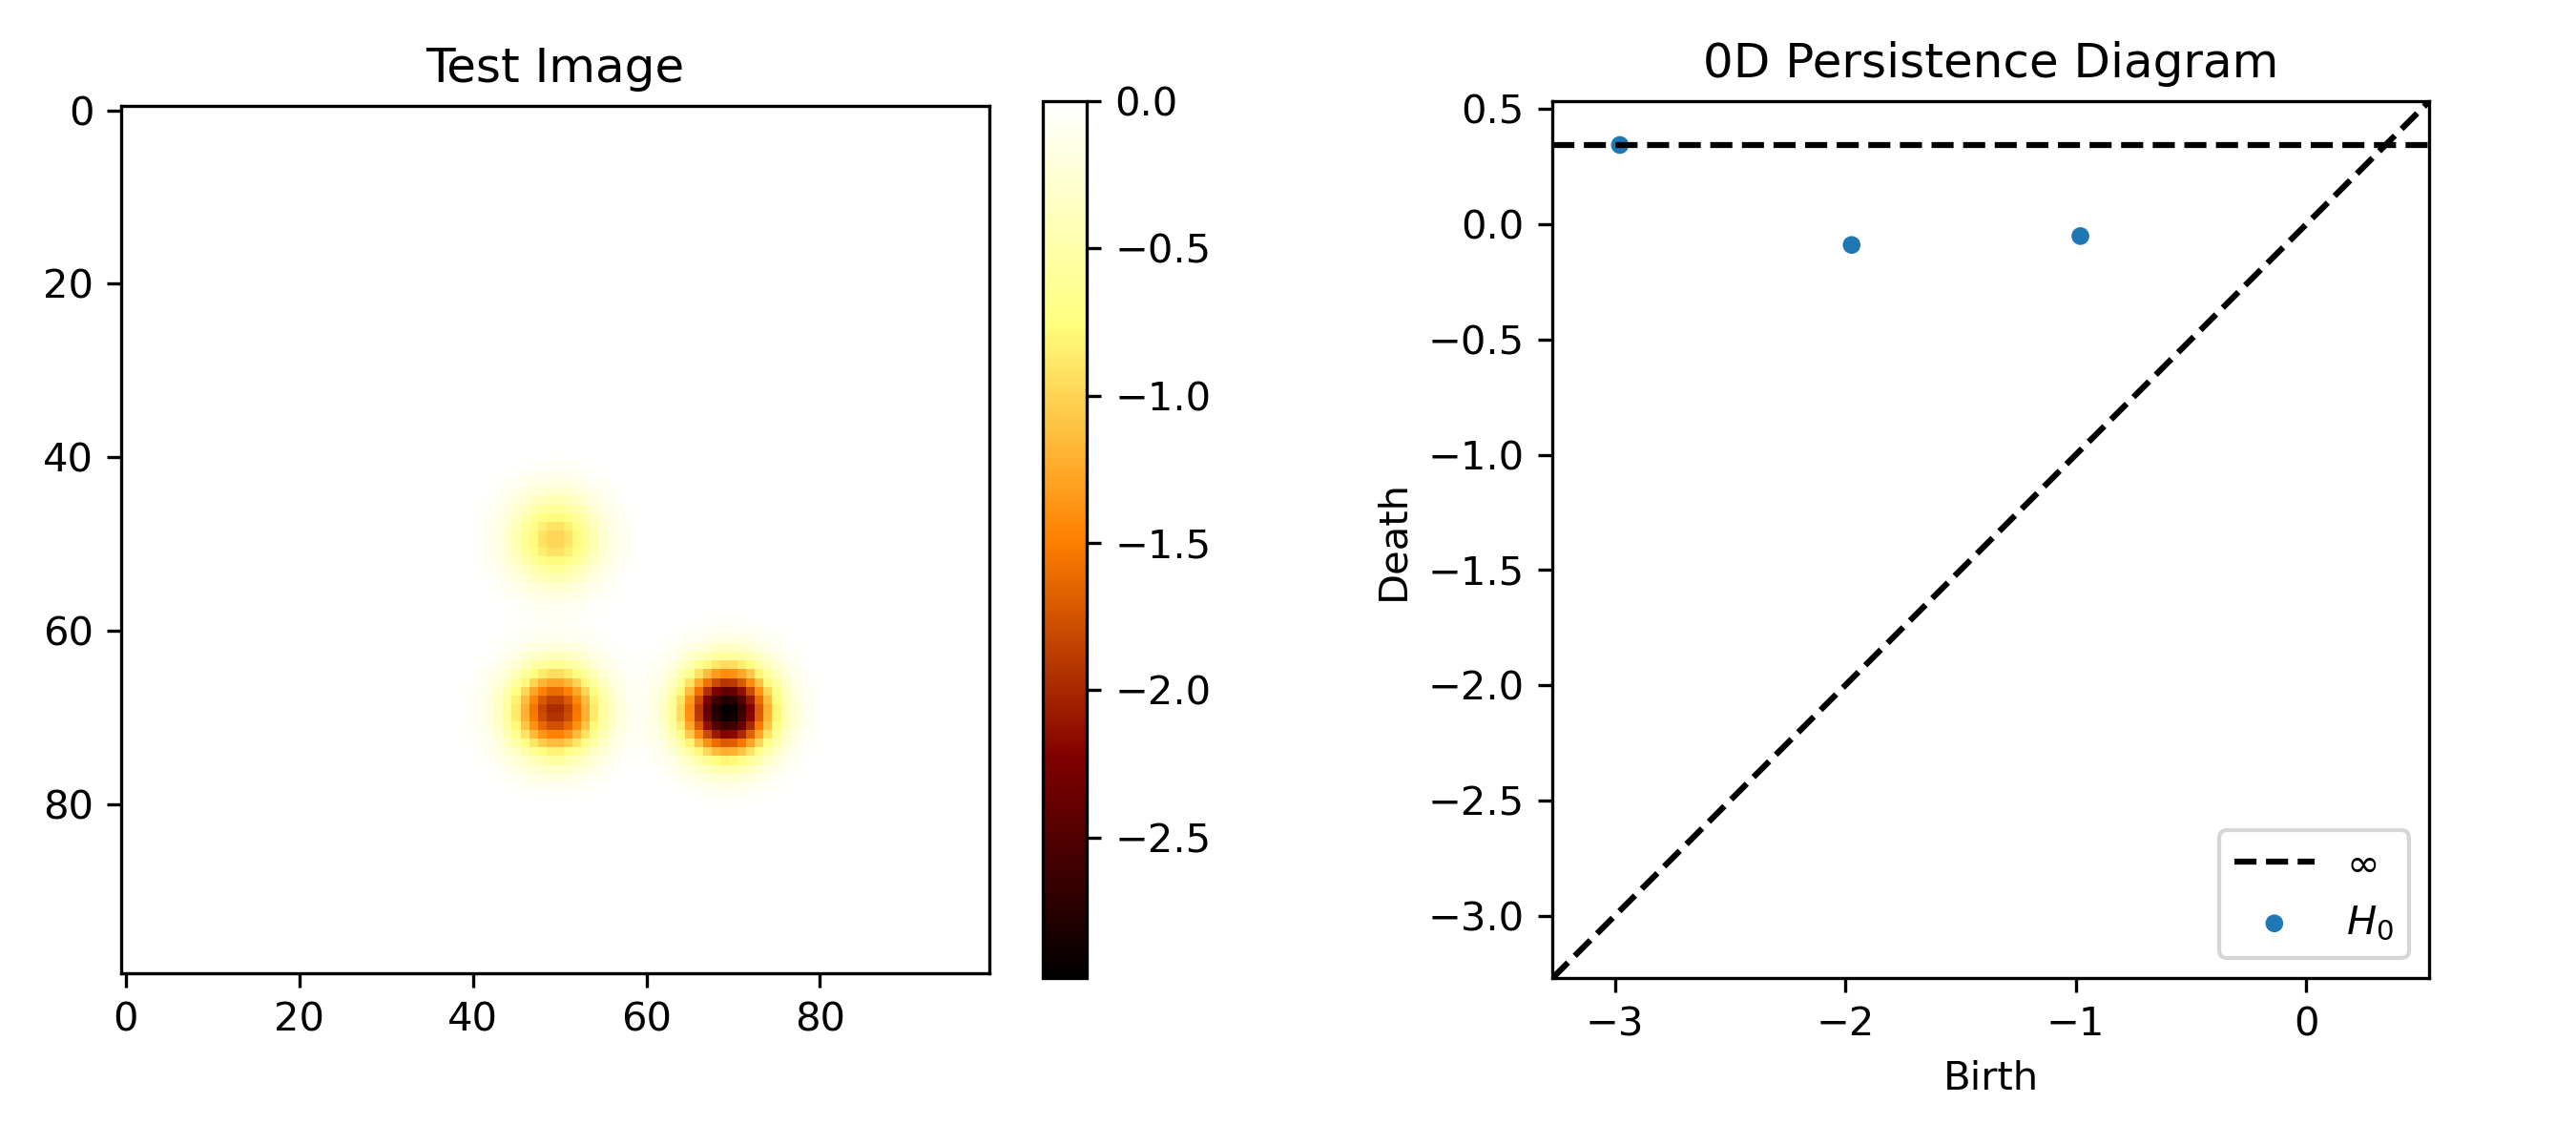

In [13]:
I = lower_star_image(img)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.imshow(img, cmap = 'afmhot')
plt.colorbar()
plt.title("Test Image")
plt.subplot(122)
plot_dgms(I)
plt.title("0D Persistence Diagram")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


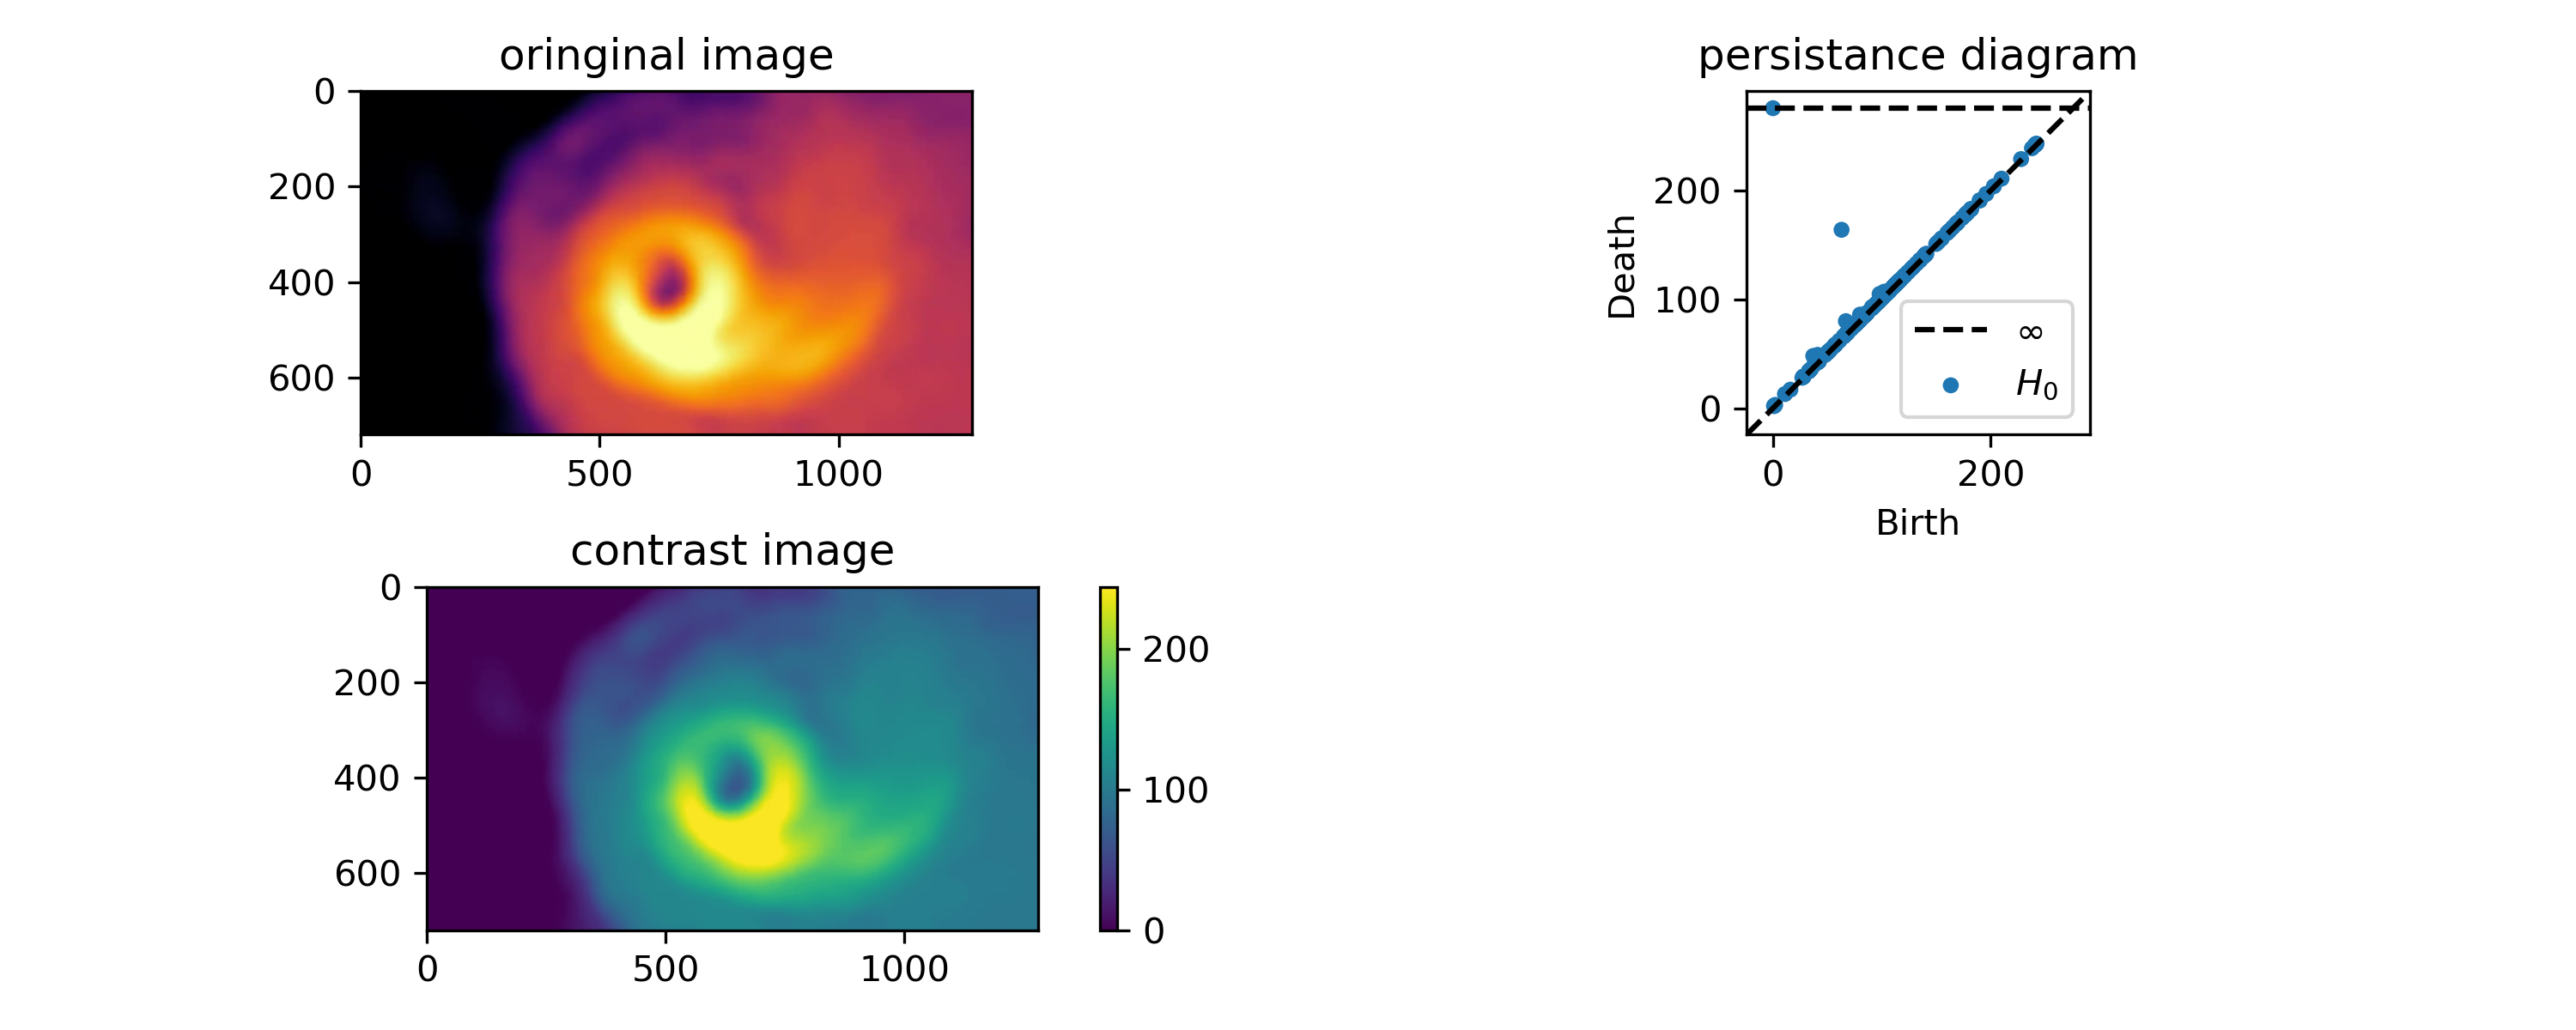

In [14]:
blackhole_original = plt.imread(r'C:\Users\feliz\Downloads/agujero.jpg')
blackhole_grey = np.asarray(PIL.Image.fromarray(blackhole_original).convert('L'))
I = lower_star_image(blackhole_grey)
plt.figure(figsize=(10, 4))
plt.subplot(221)
plt.title("oringinal image")
plt.imshow(blackhole_original)
plt.subplot(223)
plt.title("contrast image")
plt.imshow(blackhole_grey)
plt.colorbar()
plt.subplot(222)
plt.title("persistance diagram")
plot_dgms(I)
plt.tight_layout()

<IPython.core.display.Javascript object>


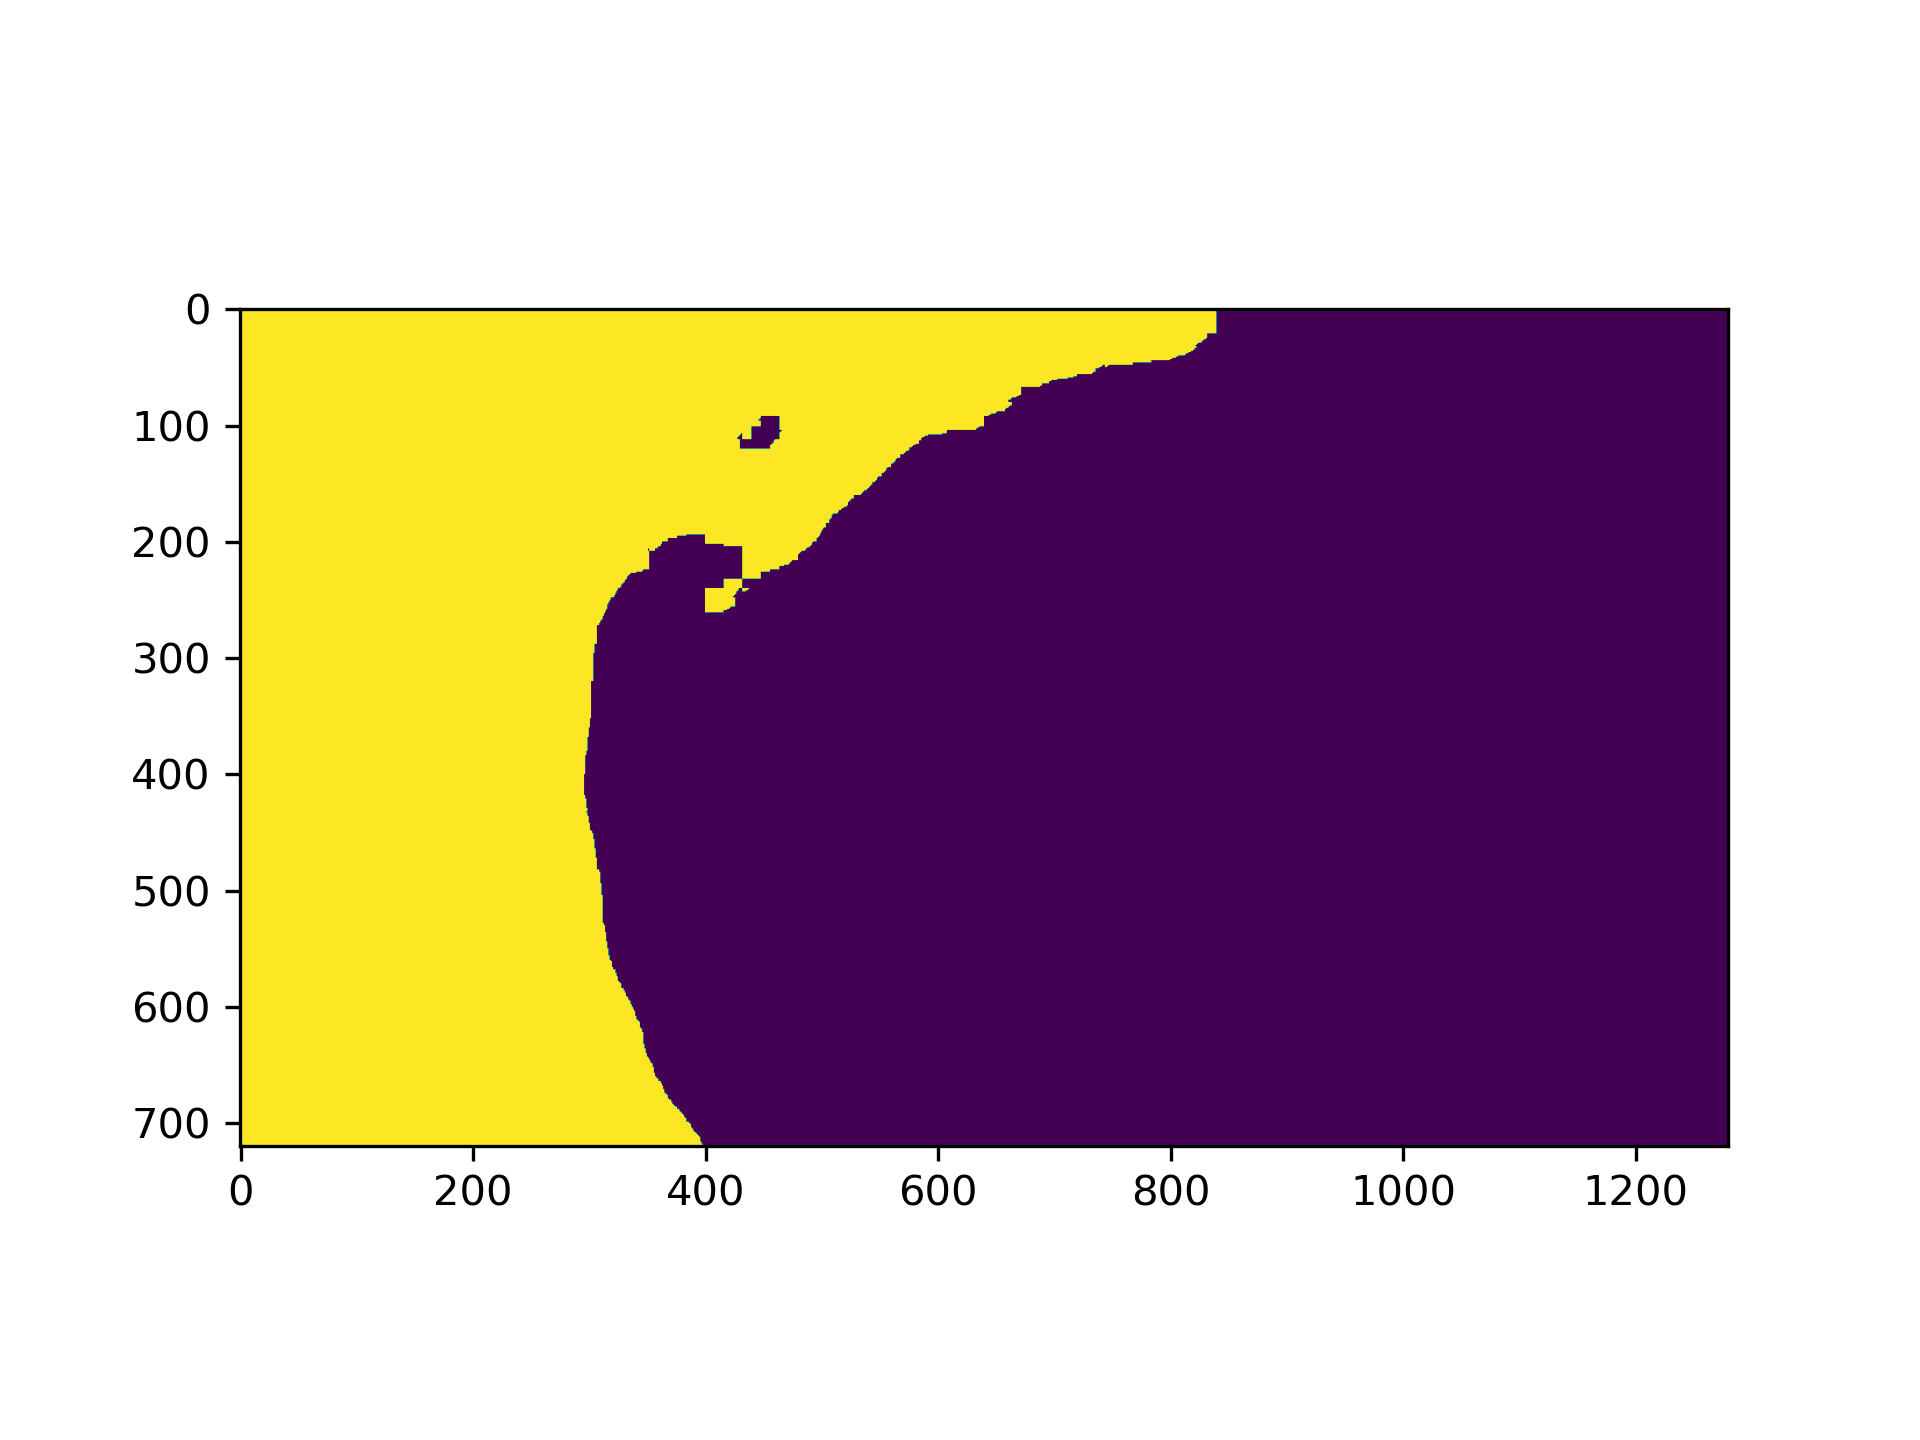

In [13]:
plt.figure()
plt.imshow(blackhole_grey < 60)